In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('~/Documents/Uni/Muscles/task2.csv')
amps = np.array(df['amp'][12000:])

In [3]:
dt = 0.1
time = np.arange(0, len(amps)*dt, dt)

# Info 
Time step = **0.1 s** </br>

**First 20 minutes - artefacts**</br>

Stabilization **0-43 minutes** </br>
Chelerythrine **43-53 minutes** </br>
Oxytocine **84-92 minutes** </br>
Oxytocine + Chelerythrine **124-134**

# Visualizing

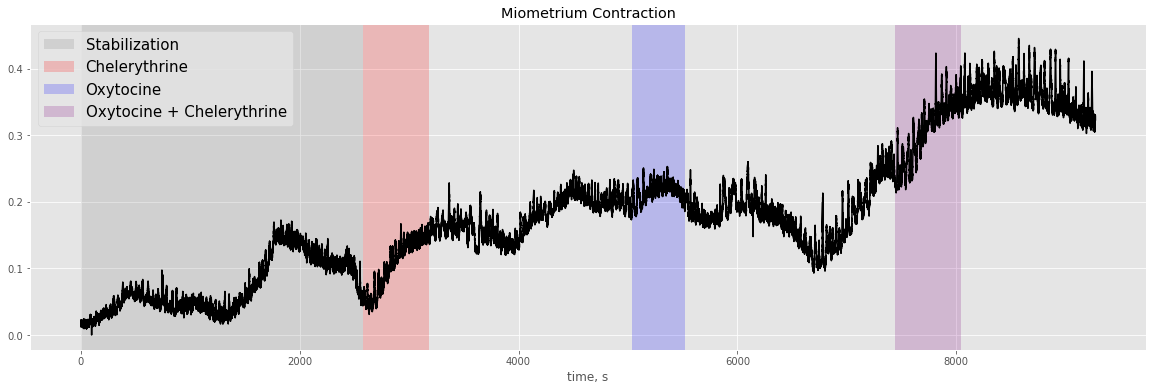

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(time, amps, color='k')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.axvspan(0, 43*60, facecolor='grey', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')
plt.axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')
plt.axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')
plt.legend(prop={'size': 15})

# Baseline Removal

In [5]:
import peakutils
from BaselineRemoval import BaselineRemoval

In [6]:
baseline_values = peakutils.baseline(amps, 4)
amps_aligned = amps - baseline_values 

[Text(0.5, 0, 'time, s')]

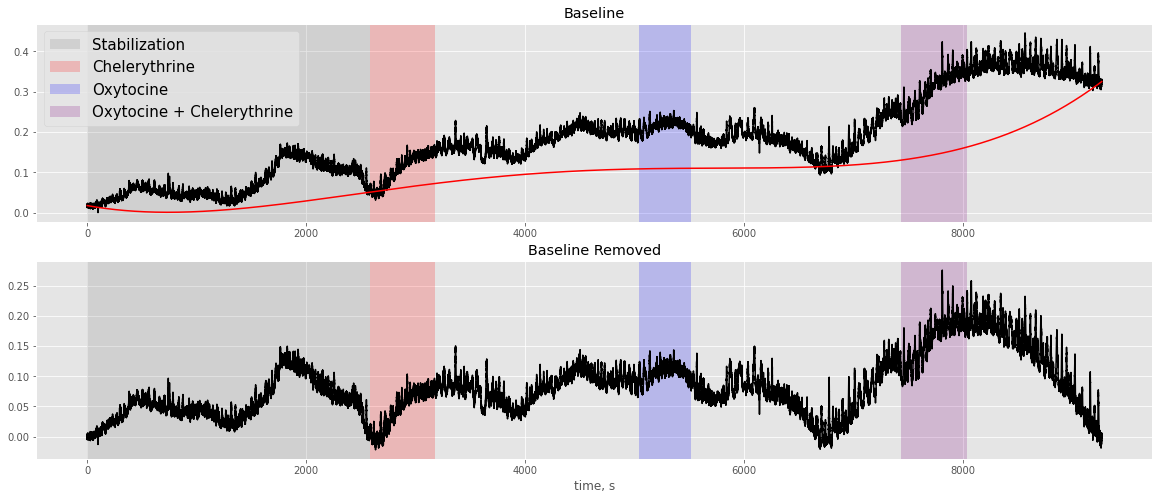

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))

ax[0].plot(time, amps, color='k')
ax[0].plot(time, baseline_values, color='r')

ax[0].axvspan(0, 43*60, facecolor='grey', edgecolor='None', 
            alpha=.2, label='Stabilization')
ax[0].axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')
ax[0].axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')
ax[0].axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')

ax[0].set_title('Baseline')
ax[0].legend(prop={'size': 15})


ax[1].plot(time, amps_aligned, color='k')

ax[1].axvspan(0, 43*60, facecolor='grey', edgecolor='None', 
            alpha=.2, label='Stabilization')
ax[1].axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')
ax[1].axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')
ax[1].axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')

ax[1].set_title('Baseline Removed')

ax[1].set(xlabel='time, s')


# Analyzing



In [8]:
from scipy.signal import find_peaks, peak_widths

In [9]:
aligned = BaselineRemoval(amps_aligned)
zhang = aligned.ZhangFit()

In [44]:
peaks, peak_values = find_peaks(zhang, height=0.03, distance=200)
widths, width_heights, left, right = peak_widths(zhang, peaks, rel_height=0.95)
half_widths, width_heights_half, left_half, right_half = peak_widths(zhang, peaks, rel_height=0.5)
left = left.astype(int)
right = right.astype(int)
left_half = left_half.astype(int)

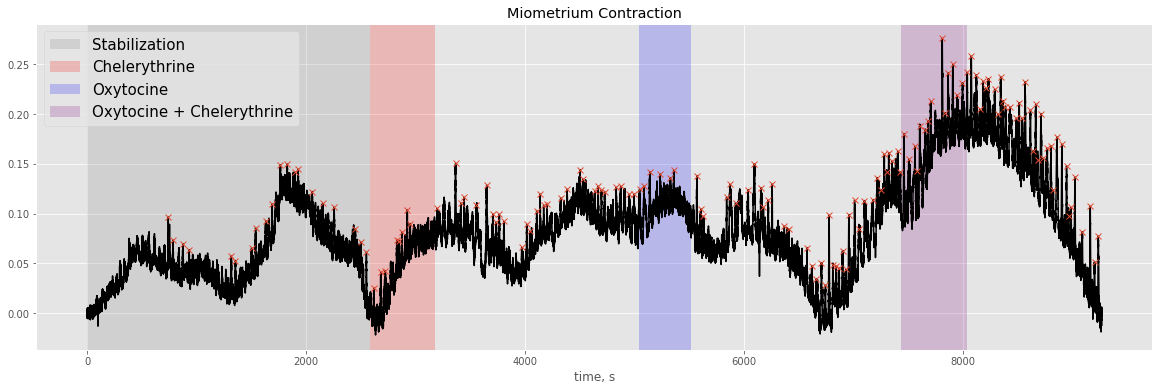

In [45]:
plt.figure(figsize=(20,6))
plt.plot(time, amps_aligned, color='k')
plt.plot(time[peaks], amps_aligned[peaks], 'x')

plt.axvspan(0, 43*60, facecolor='grey', edgecolor='None', 
            alpha=.2, label='Stabilization')
plt.axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')
plt.axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')
plt.axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')
plt.title('Miometrium Contraction')
plt.xlabel('time, s')
plt.legend(prop={'size': 15})

(-0.3, 0.3)

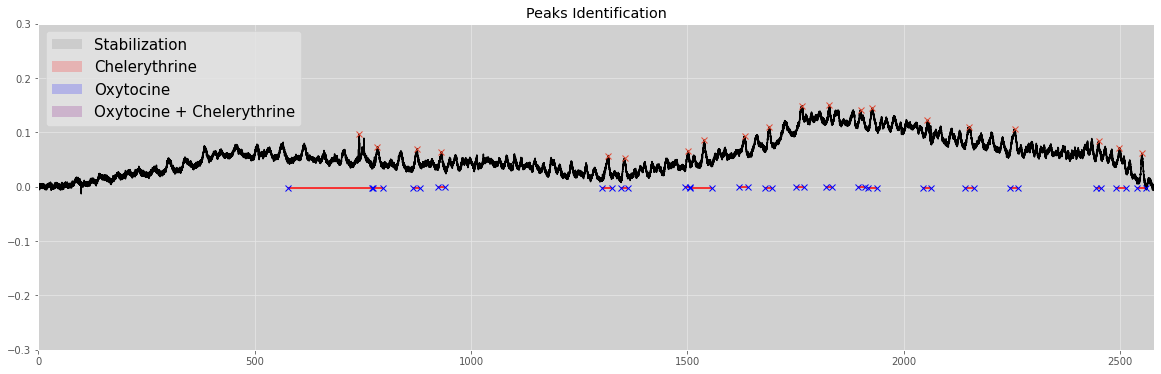

In [46]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(time, amps_aligned, color='k')
ax.plot(time[peaks], amps_aligned[peaks], 'x')
ax.plot(left*dt, width_heights, 'x', color='blue')
ax.plot(right*dt, width_heights, 'x', color='blue')
ax.hlines(width_heights, left*dt, right*dt, color="red")

ax.axvspan(0, 43*60, facecolor='grey', edgecolor='None', 
            alpha=.2, label='Stabilization')
ax.axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')
ax.axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')
ax.axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')

ax.set_title('Peaks Identification')
ax.legend(prop={'size': 15})

ax.set_xlim(0, 43*60)
ax.set_ylim([-0.3, 0.3])

# ax.set_xlim(30*60, 35*60)

(-0.3, 0.3)

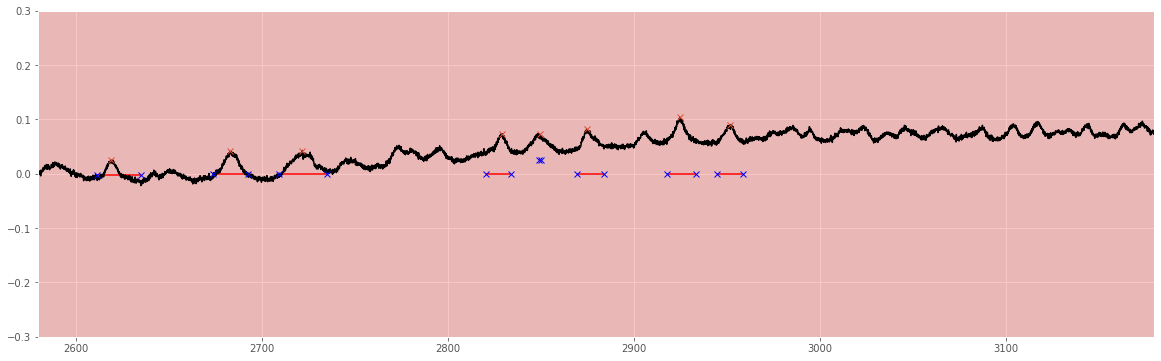

In [41]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(time, amps_aligned, color='k')
ax.plot(time[peaks], amps_aligned[peaks], 'x')
ax.plot(left*dt, width_heights, 'x', color='blue')
ax.plot(right*dt, width_heights, 'x', color='blue')
ax.hlines(width_heights, left*dt, right*dt, color="red")

ax.axvspan(43*60, 53*60, facecolor='red', edgecolor='None', 
            alpha=.2, label='Chelerythrine')

ax.set_xlim(43*60, 53*60)
ax.set_ylim([-0.3, 0.3])

(-0.3, 0.3)

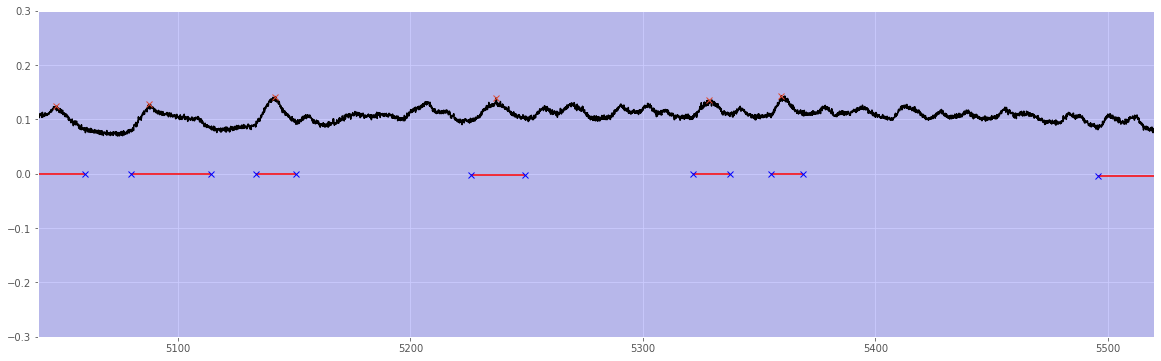

In [42]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(time, amps_aligned, color='k')
ax.plot(time[peaks], amps_aligned[peaks], 'x')
ax.plot(left*dt, width_heights, 'x', color='blue')
ax.plot(right*dt, width_heights, 'x', color='blue')
ax.hlines(width_heights, left*dt, right*dt, color="red")

ax.axvspan(84*60, 92*60, facecolor='blue', edgecolor='None', 
            alpha=.2, label='Oxytocine')

ax.set_xlim(84*60, 92*60)
ax.set_ylim([-0.3, 0.3])

[Text(0.5, 0, 'time, ms')]

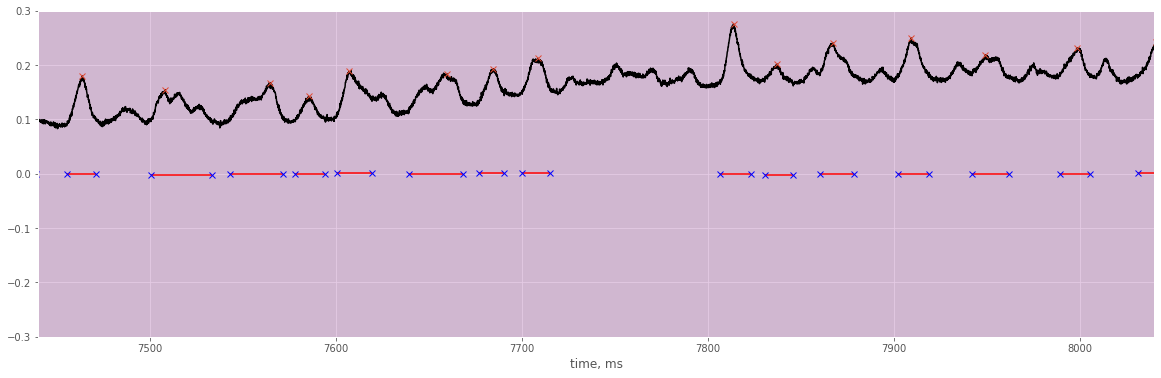

In [43]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(time, amps_aligned, color='k')
ax.plot(time[peaks], amps_aligned[peaks], 'x')
ax.plot(left*dt, width_heights, 'x', color='blue')
ax.plot(right*dt, width_heights, 'x', color='blue')
ax.hlines(width_heights, left*dt, right*dt, color="red")

ax.axvspan(124*60, 134*60, facecolor='purple', edgecolor='None', 
            alpha=.2, label='Oxytocine + Chelerythrine')

ax.set_xlim(124*60, 134*60)
ax.set_ylim([-0.3, 0.3])

ax.set(xlabel='time, ms')

## Calculating Peak Amplitudes, Half-Widths and Areas

In [33]:
from scipy.integrate import simps
from scipy.stats import sem

In [34]:
g = {'control': [], 'Chelerythrine': [], 'Oxytocine': [], 'Oxytocine + Chelerythrine': []}
gms = {'control': [], 'Chelerythrine': [], 'Oxytocine': [], 'Oxytocine + Chelerythrine': []}
hw = {'control': [], 'Chelerythrine': [], 'Oxytocine': [], 'Oxytocine + Chelerythrine': []}
i=0

for peak in peaks:
    a = amps_aligned[left[i]:right[i]]
    t = time[left[i]:right[i]]
    h = half_widths[i]*dt*1000
    area = simps(a, 1000*t)
    if max(t) <= 43*60:
        g['control'].append(amps_aligned[peak])
        gms['control'].append(area)
        hw['control'].append(h)
    elif max(t) <= 53*60:
        g['Chelerythrine'].append(amps_aligned[peak])
        gms['Chelerythrine'].append(area)
        hw['Chelerythrine'].append(h)
    elif 84*60 <= max(t) <= 92*60:
        g['Oxytocine'].append(amps_aligned[peak])
        gms['Oxytocine'].append(area)
        hw['Oxytocine'].append(h)
    elif 124*60 <= max(t) <= 134*60:
        g['Oxytocine + Chelerythrine'].append(amps_aligned[peak])
        gms['Oxytocine + Chelerythrine'].append(area)
        hw['Oxytocine + Chelerythrine'].append(h)
    i+=1

In [35]:
y = [np.mean(g['control']), np.mean(g['Chelerythrine']), np.mean(g['Oxytocine']), np.mean(g['Oxytocine + Chelerythrine'])]
labels = ['Control', 'Chelerythrine', 'Oxytocine', 'Oxytocine + Chelerythrine']
x = np.arange(len(labels))
error = [sem(g['control']), sem(g['Chelerythrine']), sem(g['Oxytocine']), sem(g['Oxytocine + Chelerythrine'])]

In [36]:
table = {'Application': ['Control', 'Chelerythrine', 'Oxytocine', 'Oxytocine + Chelerythrine'], 
         'Peak Amplitude, g': y, 
         'Half-widths, ms': [np.mean(hw['control']), np.mean(hw['Chelerythrine']), np.mean(hw['Oxytocine']), np.mean(hw['Oxytocine + Chelerythrine'])], 
         'Area, gms': [np.mean(gms['control']), np.mean(gms['Chelerythrine']), np.mean(gms['Oxytocine']), np.mean(gms['Oxytocine + Chelerythrine'])]}
df = pd.DataFrame(table)
display(df)

,Application,"Peak Amplitude, g","Half-widths, ms","Area, gms"
0,Control,0.095453,6515.342791,1335.414824
1,Chelerythrine,0.066290,6337.215032,652.559713
2,Oxytocine,0.135444,8610.503370,2424.386966
3,Oxytocine + Chelerythrine,0.202897,8168.536361,3359.209231


## Average Peak Amplitudes Errorbars

[Text(0, 0, 'Control'),
 Text(1, 0, 'Chelerythrine'),
 Text(2, 0, 'Oxytocine'),
 Text(3, 0, 'Oxytocine + Chelerythrine')]

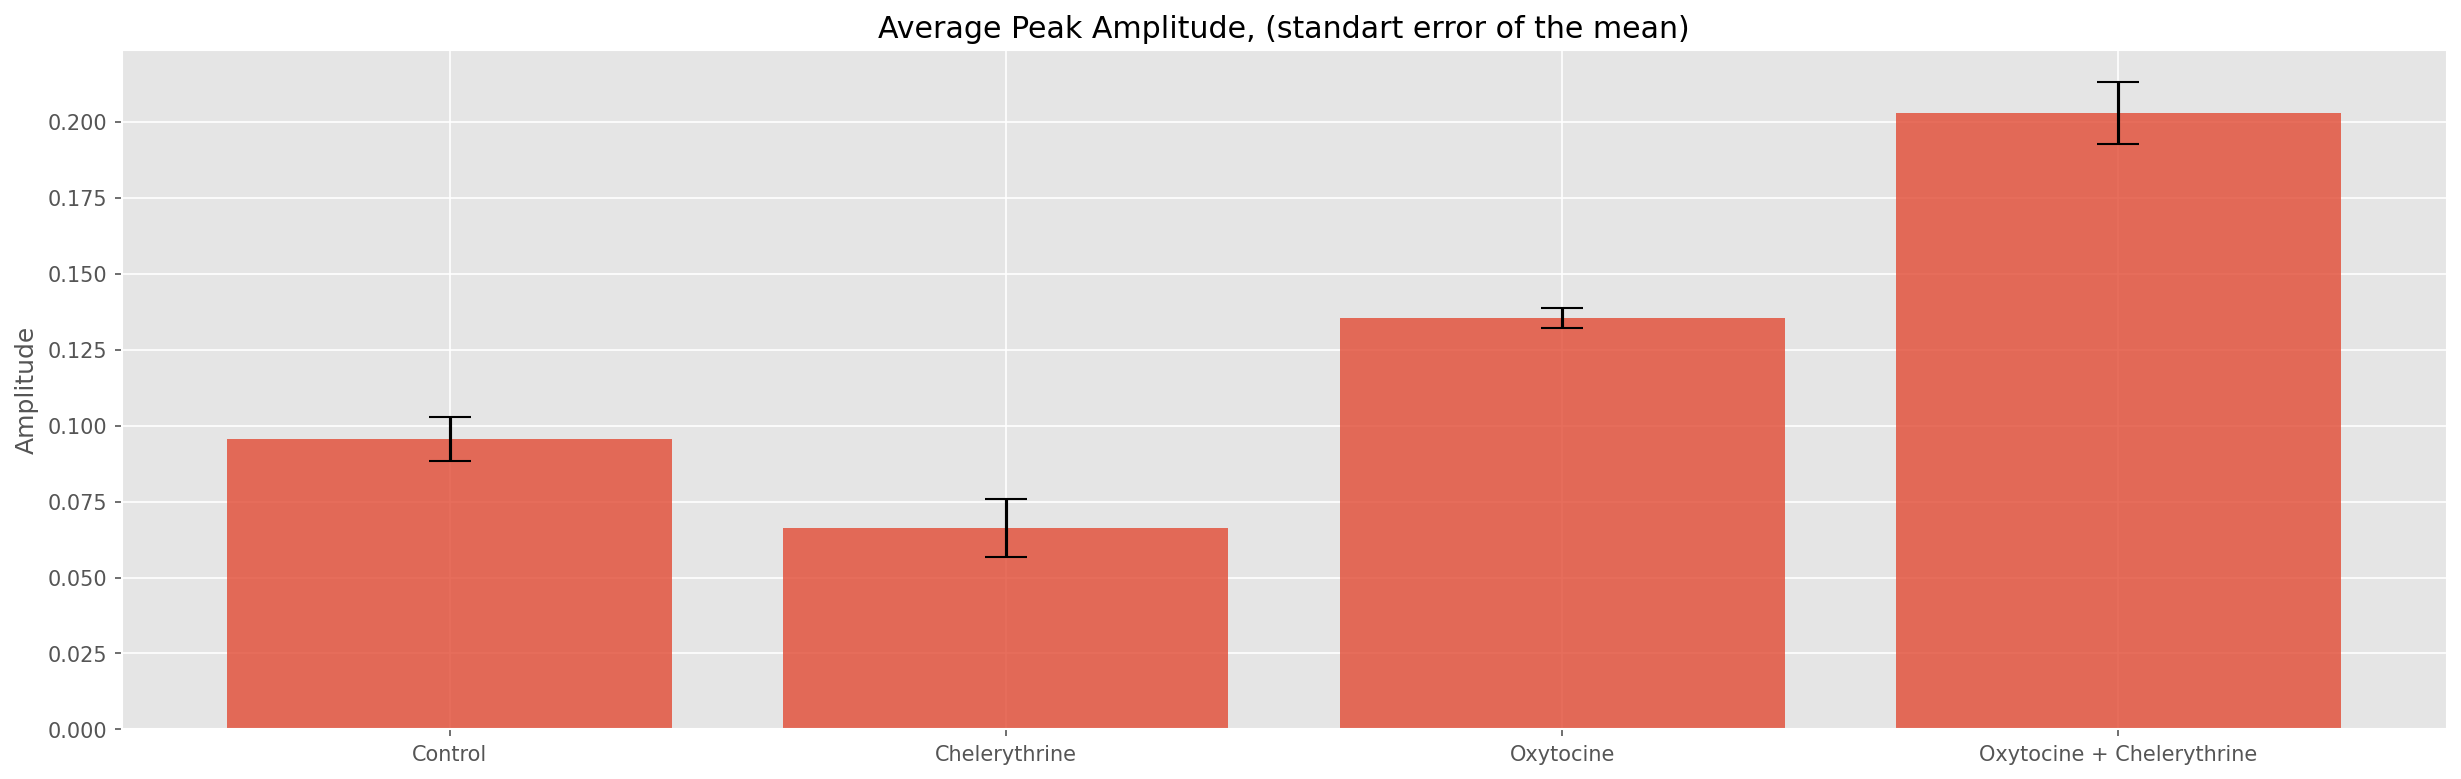

In [37]:
fig, ax = plt.subplots(dpi=150, figsize=(20,6));
ax.bar(x, y, yerr=error, align='center', alpha=0.8, ecolor='black', capsize=10);
ax.set(ylabel='Amplitude');
ax.set_xticks(x);
ax.set_title('Average Peak Amplitude, (standart error of the mean)');
ax.set_xticklabels(labels)